In [15]:
import vtk
import networkx as nx

import os 

import ast
import numpy as np

#from writeNodesEdges import writeObjects
from config.writeMotifs import writeNetworksMotifs

In [16]:
# ---------------------------SETUP AND COLLECTION OF QUAKES------------------------------------#
# Which region do you want to analyze ?
region = input('Input region : vrancea / romania / california / italy / japan : ')

# The side of the cubes that you split the region in 
side = int(input('Input side of the cube split in km 5 / 10 / 20 - recommended = 5 : '))

# Select desired magnitude threshold
mag = int(input('Select desired magnitude threshold - recommended = 4 : '))

G = nx.read_gexf(f'./results/{region}/networks/view/network{region}_{side}km_{mag}mag.gexf')
#G = nx.read_graphml(f'./results/{region}/networks/view/network{region}_{side}km_{mag}mag.xml')


motif = input('Input motif: Triangles (for areas) / Tetrahedrons (for volumes) : ')

In [17]:
# Use readlines() to open the 
fileMotif = open(f'./results/{region}/networks/motifs/motifs{motif}_network{region}_{side}km_{mag}mag.txt', 'r')
linesMotif = fileMotif.readlines()

In [18]:
# Properly evaluate the Lines to get the Lists
motifNodes=[]
for item in linesMotif:
    motifNodes.append(ast.literal_eval(item))

In [19]:
if motif == 'Triangles':    
    # Graph containing triangles only
    H = nx.Graph()
    for item in motifNodes:
        H.add_edge(int(item[0]),int(item[1]))
        H.add_edge(int(item[1]),int(item[2]))
        H.add_edge(int(item[0]),int(item[2]))

else:
    # Graph containing squares only
    H = nx.Graph()
    for item in motifNodes:
        H.add_edge(int(item[0]),int(item[1]))
        H.add_edge(int(item[1]),int(item[2]))
        H.add_edge(int(item[2]),int(item[3]))
        H.add_edge(int(item[0]),int(item[3]))

    
# Set the triangle attribute = 0 to each edge
nx.set_edge_attributes(G, 0, name=motif)

In [20]:
G.nodes()

NodeView(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157',

In [21]:
G.edges()

EdgeView([('1', '2'), ('2', '3'), ('2', '28'), ('2', '168'), ('3', '4'), ('4', '5'), ('5', '6'), ('5', '420'), ('5', '421'), ('5', '454'), ('5', '111'), ('5', '281'), ('5', '472'), ('5', '481'), ('5', '480'), ('5', '513'), ('5', '514'), ('6', '7'), ('7', '8'), ('7', '385'), ('7', '486'), ('8', '9'), ('9', '10'), ('10', '11'), ('11', '12'), ('12', '13'), ('13', '14'), ('14', '15'), ('15', '16'), ('16', '17'), ('17', '18'), ('18', '19'), ('18', '277'), ('18', '28'), ('19', '20'), ('20', '21'), ('21', '22'), ('21', '23'), ('23', '24'), ('24', '25'), ('25', '26'), ('26', '27'), ('26', '300'), ('26', '671'), ('26', '672'), ('27', '28'), ('28', '29'), ('29', '30'), ('30', '31'), ('31', '32'), ('31', '369'), ('31', '300'), ('32', '33'), ('33', '34'), ('34', '35'), ('34', '42'), ('34', '34'), ('34', '43'), ('35', '36'), ('35', '40'), ('35', '41'), ('36', '37'), ('36', '41'), ('36', '42'), ('36', '44'), ('37', '38'), ('38', '39'), ('39', '40'), ('43', '44'), ('44', '45'), ('44', '104'), ('44', 

In [22]:
G = nx.convert_node_labels_to_integers(G,first_label=1)

In [23]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

In [24]:
G.edges()

EdgeView([(1, 2), (2, 3), (2, 28), (2, 168), (3, 4), (4, 5), (5, 6), (5, 420), (5, 421), (5, 454), (5, 111), (5, 281), (5, 472), (5, 481), (5, 480), (5, 513), (5, 514), (6, 7), (7, 8), (7, 385), (7, 486), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (18, 277), (18, 28), (19, 20), (20, 21), (21, 22), (21, 23), (23, 24), (24, 25), (25, 26), (26, 27), (26, 300), (26, 671), (26, 672), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (31, 369), (31, 300), (32, 33), (33, 34), (34, 35), (34, 42), (34, 34), (34, 43), (35, 36), (35, 40), (35, 41), (36, 37), (36, 41), (36, 42), (36, 44), (37, 38), (38, 39), (39, 40), (43, 44), (44, 45), (44, 104), (44, 105), (44, 134), (44, 291), (45, 46), (46, 47), (47, 48), (48, 49), (48, 472), (48, 475), (49, 49), (49, 50), (49, 236), (49, 237), (49, 242), (49, 243), (50, 51), (51, 52), (52, 53), (53, 54), (53, 713), (53, 71), (54, 55), (54, 54), (54, 56), (56, 57), (56, 58), (58, 59), (59, 60), (

In [25]:
for node in G.nodes():
    print(type(node))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

In [26]:
# Set the triangle attribute = 0 to each edge
nx.set_edge_attributes(G, 0, name=motif)


#G = nx.convert_node_labels_to_integers(G,first_label=1)

# Iterate through our triangle only network edges
for (u,v) in H.edges():
    # Assign to original network edges the attribute triangle = 1
    G[u][v][motif] = 1

In [12]:
# Get attributes that go into VTK function

# X Y Z coords
lat =[]
long = []
depth =[]
for n in G.nodes():
    lat.append(int(G.nodes[n]['quake_xLatitude']))
    long.append(int(G.nodes[n]['quake_yLongitude']))
    depth.append(int(G.nodes[n]['quake_zDepth']))

minLat = min(lat)
maxLat = max(lat)
minLong = min(long)
maxLong = max(long)
minDepth = min(depth)
maxDepth = max(depth)
maxDimension = max(maxLat,maxLong,maxDepth)


coords=[]
for n in G.nodes():
    coords.append([ np.float32(round((int(G.nodes[n]['quake_xLatitude']) - minLat)*(maxLat/maxDimension)/(maxLat-minLat),3)),
                    np.float32(round((int(G.nodes[n]['quake_yLongitude']) - minLong)*(maxLong/maxDimension)/(maxLong-minLong),3)),
                    np.float32(round((int(G.nodes[n]['quake_zDepth']) - minDepth)*(maxDepth/maxDimension)/(maxDepth-minDepth),3))])


# Degree of nodes edges    
degree = [d for n, d in G.degree()]

# # Weight of edges
# weights = []
# for (i,j) in G.edges():
#     weights.append(G[i][j]['weight'])

# # Triangle quality of edges
# motifs = []
# for (i,j) in G.edges():
#     motifs.append(G[i][j][motif])

In [13]:
for line in coords:
    for coord in line:
        if coord < 0 or coord > 1:
            print(True)


In [14]:
motifNodes

[['77', '76', '7'], ['141', '108', '52'], ['122', '121', '39']]

In [15]:

if not os.path.exists(f'./results/{region}/networksview'):
    os.makedirs(f'./results/{region}/networksview')
os.chdir(f'./results/{region}/networksview')


In [15]:

# Write the VTK file that goes in Paraview
# The network
writeNetworksMotifs(nodeCoords=coords,
#                motifCoords=motifNodes,
#                edges=G.edges(),
#                scalar=degree, name='degree',
#                scalar2=weights, name2='weight',
#                escalar2=motifs, ename2=motif,
#               nodeLabel=nodeLabel,
                fileout=f'network{region}_{side}km_{mag}mag_{motif}')

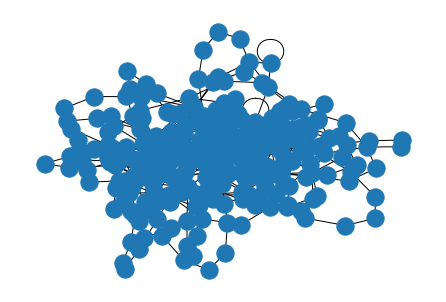

In [14]:
nx.draw(G)

In [16]:

# Write the VTK file that goes in Paraview
# The network
writeNetworksMotifs(nodeCoords=coords,
#                motifCoords=motifNodes,
                edges=G.edges(),
#                scalar=degree, name='degree',
#                scalar2=weights, name2='weight',
#                escalar2=motifs, ename2=motif,
#               nodeLabel=nodeLabel,
                fileout=f'network{region}_{side}km_{mag}mag_{motif}')

In [22]:
nodeCoords=coords

In [23]:
# INITIALIZE THE NODES 
points = vtk.vtkPoints()
for node in nodeCoords:
    points.InsertNextPoint(node)

In [17]:
edges = G.edges()

In [18]:
lines = vtk.vtkCellArray()
lines.Allocate(len(edges))
for edge in edges:
    line = vtk.vtkLine()
    line.GetPointIds().SetId(0,edge[0])  
    line.GetPointIds().SetId(1,edge[1])  # line from point edge[0] to point edge[1]
    lines.InsertNextCell(line)

In [24]:
points

<vtkmodules.vtkCommonCore.vtkPoints(0x37523b0) at 0x7fa6260642e0>

In [25]:
fileout=f'network{region}_{side}km_{mag}mag_{motif}'

In [26]:
polydata = vtk.vtkPolyData()
polydata.SetPoints(points)
polydata.SetLines(lines)

writer = vtk.vtkXMLPolyDataWriter()
writer.SetFileName(fileout+'.vtp')
writer.SetInputData(polydata)
writer.Write()
    

1

In [7]:
import matplotlib.pyplot as plt
import os
import networkx as nx
import numpy as np


from config.sqlcollect import getTable
from config.seismicZones import query
from config.network import graphCreation
from config.cubes import makeCubes

In [2]:
# ---------------------------SETUP AND COLLECTION OF QUAKES------------------------------------#
# Which region do you want to analyze ?
region = input('Input region : vrancea / romania / california / italy / japan : ')

# The side of the cubes that you split the region in 
side = int(input('Input side of the cube split in km 5 / 10 / 20 - recommended = 5 : '))

# Select desired magnitude threshold
mag = int(input('Select desired magnitude threshold - recommended = 4 : '))



#motif = input('Input motif: Triangles (for areas) / Tetrahedrons (for volumes) : ')

In [3]:
# The query for the SQL collection
sql_query= query(region)


# Magnitude window for the query that collects the database through mySQL
sql_query+=f" AND magnitude>={mag}"

# Collect the earthquakes
quakes = getTable(sql_query)

# Make the Cubes
quakes = makeCubes(quakes,region,side)

# Make the network
G = graphCreation(quakes)



/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
quakes

,datetime,latitude,longitude,depth,magnitude,xLatitude,yLongitude,zDepth,cubeIndex,cubeLatitude,cubeLongitude,cubeDepth
0,1976-10-01 17:50:43.200,45.6800,26.4900,146.0,6.0,8,5,15,2618,45.6778,26.4748,146.7
1,1977-03-04 19:21:54.100,45.7700,26.7600,94.0,7.4,10,10,4,3424,45.7679,26.7913,91.7
2,1977-06-16 02:26:10.300,45.7400,26.6000,151.0,4.7,9,7,16,3018,45.7229,26.6014,151.7
3,1977-07-17 17:34:20.900,45.6000,26.6500,106.0,4.2,6,8,7,1945,45.5877,26.6647,106.7
4,1977-08-04 22:32:02.100,45.6800,26.6200,146.0,4.8,8,7,15,2656,45.6778,26.6014,146.7
...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-05-25 21:30:37.400,45.5377,26.5247,131.2,4.3,5,6,12,1551,45.5427,26.5381,131.7
381,2021-07-06 11:20:00.440,45.5777,26.4473,136.2,4.0,6,5,13,1894,45.5877,26.4748,136.7
382,2021-09-01 10:32:11.740,45.6337,26.4457,145.2,4.1,7,5,14,2256,45.6328,26.4748,141.7
383,2022-01-16 13:43:14.950,45.6541,26.5710,137.4,4.1,7,7,13,2293,45.6328,26.6014,136.7


In [5]:
nx.info(G)

/tmp/ipykernel_234913/1064119803.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 264 nodes and 381 edges'

In [8]:
# X Y Z coords
lat =[]
long = []
depth =[]
for n in G.nodes():
    lat.append(int(G.nodes[n]['quake_xLatitude']))
    long.append(int(G.nodes[n]['quake_yLongitude']))
    depth.append(int(G.nodes[n]['quake_zDepth']))

minLat = min(lat)
maxLat = max(lat)
minLong = min(long)
maxLong = max(long)
minDepth = min(depth)
maxDepth = max(depth)
maxDimension = max(maxLat,maxLong,maxDepth)


coords=[]
for n in G.nodes():
    coords.append([ np.float32(round((int(G.nodes[n]['quake_xLatitude']) - minLat)*(maxLat/maxDimension)/(maxLat-minLat),3)),
                    np.float32(round((int(G.nodes[n]['quake_yLongitude']) - minLong)*(maxLong/maxDimension)/(maxLong-minLong),3)),
                    np.float32(round((int(G.nodes[n]['quake_zDepth']) - minDepth)*(maxDepth/maxDimension)/(maxDepth-minDepth),3))])
  

In [10]:
from config.writeMotifs import writeNetworksMotifs

In [11]:
# Write the VTK file that goes in Paraview
# The network
writeNetworksMotifs(nodeCoords=coords,
#                motifCoords=motifNodes,
                edges=G.edges(),
 #               scalar=degree, name='degree',
#                scalar2=weights, name2='weight',
##                escalar2=motifs, ename2=motif,
#               nodeLabel=nodeLabel,
                fileout=f'network{region}_{side}km_{mag}mag')

In [21]:
G = nx.Graph()

In [22]:
G.add_node(1)
G.add_node(2)

In [23]:
G.add_edge(1,1)
G.add_edge(1,2)

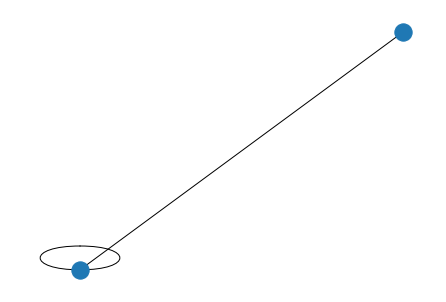

In [24]:
nx.draw(G)

In [25]:
print(nx.info(G))

Graph with 2 nodes and 2 edges


/tmp/ipykernel_234913/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [26]:
coords=[[0.5,0.5,0.5],[0.6,0.6,0.6]]

In [27]:
writeNetworksMotifs(nodeCoords=coords,
#                motifCoords=motifNodes,
                edges=G.edges(),
 #               scalar=degree, name='degree',
#                scalar2=weights, name2='weight',
##                escalar2=motifs, ename2=motif,
#               nodeLabel=nodeLabel,
                fileout='test')